/Users/jbg/.venv/lib/python3.13/site-packages/pennylane/ops/op_math/controlled_ops.py:1177: UserWarning: The control_wires keyword for MultiControlledX is deprecated, and will be removed soon. Use wires = (*control_wires, target_wire) instead.
  warnings.warn(


(<Figure size 14500x500 with 1 Axes>, <Axes: >)

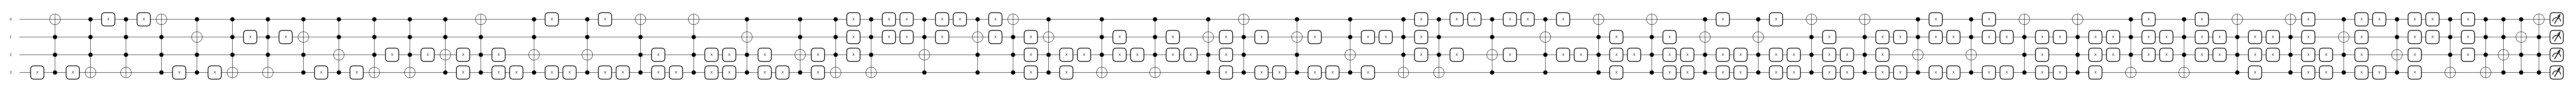

In [9]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=4)

def compute_mod_mult_perm(modulus=15, multiplier=2, nbits=4):
    return {a: (multiplier * a) % modulus for a in range(2**nbits)}

def cycles_from_perm(perm):
    visited = set()
    cycles = []
    for start in range(len(perm)):
        if start in visited or perm[start] == start:
            continue
        cycle = []
        current = start
        while current not in visited:
            visited.add(current)
            cycle.append(current)
            current = perm[current]
        if len(cycle) > 1:
            cycles.append(cycle)
    return cycles

def basis_swap(i, j, wires):
    n = len(wires)
    bits_i = [int(b) for b in format(i, f"0{n}b")]
    bits_j = [int(b) for b in format(j, f"0{n}b")]

    for idx, (bi, bj) in enumerate(zip(bits_i, bits_j)):
        if bi != bj:
            controls = []
            for k in range(n):
                if k != idx:
                    if bits_i[k] == 1:
                        qml.PauliX(wires=wires[k])
                    controls.append(wires[k])
            qml.MultiControlledX(control_wires=controls, wires=wires[idx])
            for k in range(n):
                if k != idx and bits_i[k] == 1:
                    qml.PauliX(wires=wires[k])

    for idx, (bi, bj) in reversed(list(enumerate(zip(bits_i, bits_j)))):
        if bi != bj:
            controls = []
            for k in range(n):
                if k != idx:
                    if bits_j[k] == 1:
                        qml.PauliX(wires=wires[k])
                    controls.append(wires[k])
            qml.MultiControlledX(control_wires=controls, wires=wires[idx])
            for k in range(n):
                if k != idx and bits_j[k] == 1:
                    qml.PauliX(wires=wires[k])


@qml.qnode(dev)
def modmult_by_2_mod_15():
    wires = list(range(4))

    perm = compute_mod_mult_perm()
    cycles = cycles_from_perm(perm)

    for cycle in cycles:
        for i in reversed(range(1, len(cycle))):
            basis_swap(cycle[0], cycle[i], wires)

    return qml.state()

# Draw the circuit
#drawer = qml.draw(modmult_by_2_mod_15)
#print(drawer())

qml.draw_mpl(modmult_by_2_mod_15)()
